In [35]:
# import packages
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy import stats
import os

## Restaurant EDA

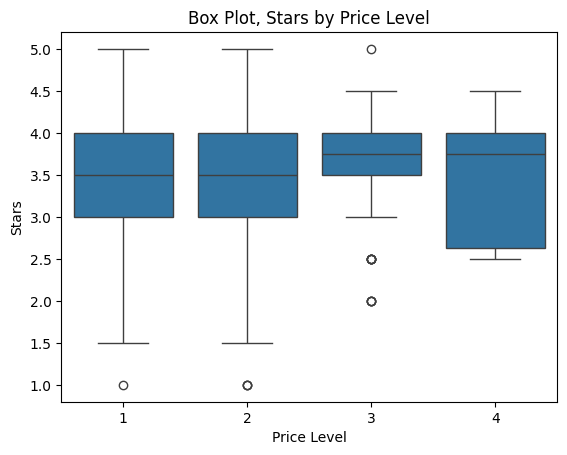

In [13]:
# Make boxplot of restaurant stars by price level
sns.boxplot(data=df_rest, x='price_level', y='stars')

# Add labels and title
plt.title('Box Plot, Stars by Price Level')
plt.xlabel('Price Level')
plt.ylabel('Stars')

# Show the plot
plt.show()

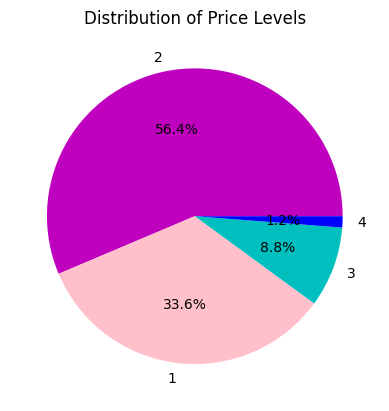

In [30]:
# Make a pie chart of restaurants by price levels
price_counts = df_rest['price_level'].value_counts()
plt.pie(price_counts, labels = price_counts.index, autopct='%1.1f%%', colors = ['m','pink','c','b'])
plt.title('Distribution of Price Levels')
plt.show()


## Perform Vader sentiment analysis on reviews

In [23]:
# Install and download VADER lexicon
nltk.download('vader_lexicon')

# change to DATA folder
os.chdir("C:/Users/ellie/OneDrive/Documents/spring 2025/ds4002/project1/Project1/DATA")

# Load the Yelp review dataset 
df = pd.read_csv('philly_reviews.csv')

# Ensure relevant columns exist 
df = df[['text', 'review_id','business_id']].dropna()

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    """Compute sentiment compound score for a given review."""
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis
df['sentiment_score'] = df['text'].apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rvt9bx/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Explore Overall Sentiment

In [3]:
# Stats for overall sentiment score
df['sentiment_score'].describe()

count    107600.000000
mean          0.715064
std           0.490530
min          -0.998800
25%           0.757900
50%           0.932900
75%           0.977000
max           0.999800
Name: sentiment_score, dtype: float64

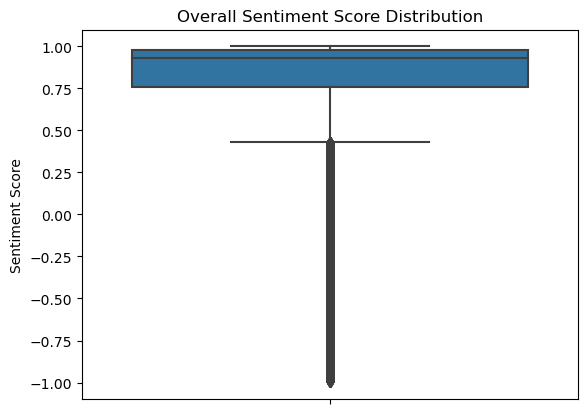

In [8]:
# Visualization
sns.boxplot(y='sentiment_score', data=df)
plt.title('Overall Sentiment Score Distribution')
plt.ylabel('Sentiment Score')
plt.show()

For all reviews (not grouped by restaurant), the mean sentiment score is 0.715064 with a standard deviation of 0.490530. 

### Group by restaurant and calculate mean sentiment score

In [4]:
# Group by business_id and calculate mean sentiment
grouped = df.groupby('business_id')['sentiment_score'].mean().reset_index()

In [10]:
# Stats for grouped sentiment score
grouped['sentiment_score'].describe()

count    816.000000
mean       0.590214
std        0.274408
min       -0.817240
25%        0.467385
50%        0.669708
75%        0.786554
max        0.986900
Name: sentiment_score, dtype: float64

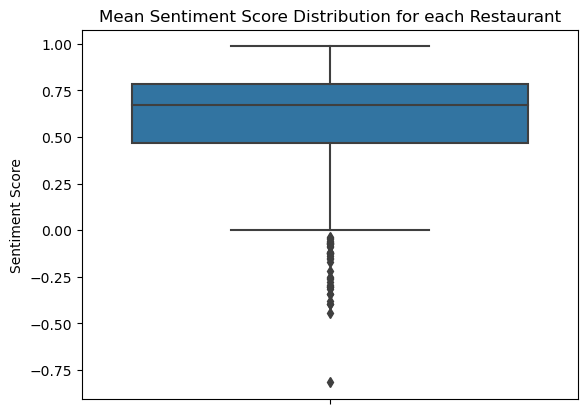

In [11]:
# Visualization
sns.boxplot(y='sentiment_score', data=grouped)
plt.title('Mean Sentiment Score Distribution for each Restaurant')
plt.ylabel('Sentiment Score')
plt.show()

# Perform ANOVA Analysis 

In [26]:
# Import restaurant data 
restaurant_df = pd.read_csv('philly_restaurants.csv',low_memory=False)

In [27]:
# Merge restaurant data with review sentiment data
df = restaurant_df.merge(grouped, how='outer', on='business_id')

In [15]:
# Export mean sentiment score dataset 
df.drop(columns=['Unnamed: 0'], inplace=True)
df.to_csv("restaurant_sentiment_scores.csv", index=False)

In [17]:
# Perform ANOVA test
price_groups = [df[df['price_level'] == p]['sentiment_score'].dropna() for p in df['price_level'].unique()]
anova_result = stats.f_oneway(*price_groups)
print(f"ANOVA p-value: {anova_result.pvalue}")

ANOVA p-value: 0.7662384737482942


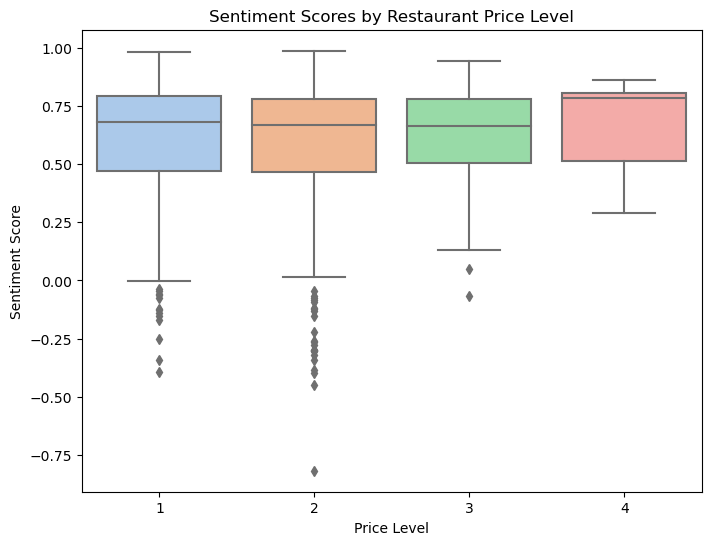

In [37]:
# Visualization 

fig, ax = plt.subplots(figsize=(8, 6))  # Assigns an Axes object

# Boxplot
sns.boxplot(x='price_level', y='sentiment_score', data=df, palette='pastel', ax=ax)

# Set title and labels on the Axes object
ax.set_title('Sentiment Scores by Restaurant Price Level')
ax.set_xlabel('Price Level')
ax.set_ylabel('Sentiment Score')

plt.show()

In [38]:
# Export visualization 
fig.savefig('sentiment_scores_by_price_boxplot.png')